9 events are observed in an experiment modeled with a Poisson probability
distribution.

(a)  What is the 95% probability lower limit on the Poisson expectation value ν? Take a flat prior for your calculations.

(b)  What is the 68% confidence level interval for ν using the Neyman construction and the smallest interval definition?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
m = np.math

In [2]:
def poisson(x, n):
    return np.exp(-x)*(np.power(x,n))/m.factorial(n)

In [3]:
n = 9
stepsize = 1./1000
x = np.arange(0,50,stepsize)
y = poisson(x, 9)

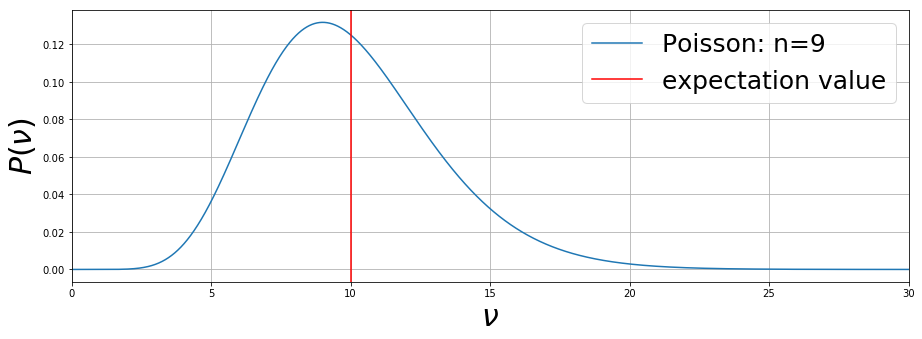

In [4]:
plt.figure(figsize=(15, 5))
plt.plot(x, y, label="Poisson: n=9")
plt.axvline([n+1], color='red', label="expectation value")
plt.grid()
plt.legend(fontsize=25)
plt.xlim(0,30)
plt.xlabel(r"$\nu$", fontsize=30)
plt.ylabel(r"$P(\nu)$", fontsize=30)
plt.show()

In [5]:
def cumulative_probability(x, n):
    csum = 0.
    for i in range(0,n+1):
        csum += np.power(x, i)/m.factorial(i)
    return 1.-np.exp(-x)*csum

In [6]:
f = cumulative_probability(x, n)

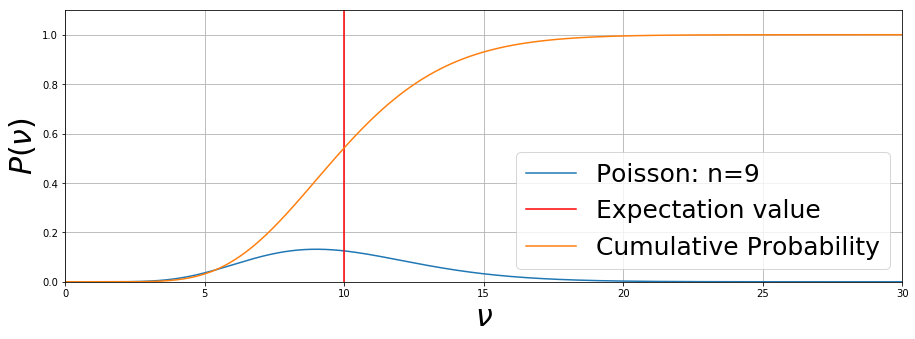

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(x, y, label="Poisson: n=9")
plt.axvline([n+1], color='red', label="Expectation value")
plt.plot(x, f, label="Cumulative Probability")
plt.ylim(0., 0.1)
plt.grid()
plt.xlim(0,30)
plt.ylim(0,1.1)
plt.xlabel(r"$\nu$", fontsize=30)
plt.ylabel(r"$P(\nu)$", fontsize=30)
plt.legend(fontsize=25)
plt.show()

In [9]:
lower_limit_idx = 0
for idx in range(0, len(x)):
    if y[idx] >= 0.05:
        lower_limit_idx = idx
        break
print("%d -> %.2f" % (lower_limit_idx, x[lower_limit_idx]))

5444 -> 5.44


# Neyman:

In [13]:
n_array = np.arange(0, 100, 1)
n_exp = np.arange(0, 100, 1) + 1 
n_mode = np.arange(0, 50, 1)

In [14]:
def create_ranking(array):
    indices = np.arange(0,len(array))
    a1, ranking = zip(*sorted(zip(array, indices)))
    return np.flip(ranking,0)


n_min=list()
n_max=list()
for mu in x:
    y = list()
    for n in n_array:
        y.append(poisson(mu, n))
    ranking = create_ranking(y)
    prob = 0.
    si_idcs = list()  # list of indicies which are in the smallest interval
    for rank in ranking:
        prob += y[rank]
        si_idcs.append(rank)
        if prob >= 0.68:
            break        
    n_min.append(min(si_idcs))
    n_max.append(max(si_idcs))

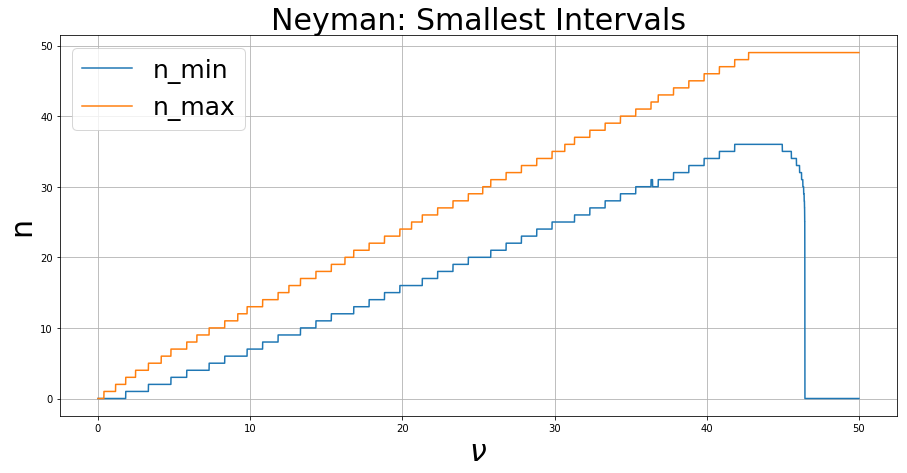

In [15]:
plt.figure(figsize=(15, 7))
plt.plot(x, n_min, label='n_min')
plt.plot(x, n_max, label='n_max')
plt.xlabel(r"$\nu$", fontsize=30)
plt.ylabel("n", fontsize=30)
plt.grid()
plt.title("Neyman: Smallest Intervals", fontsize=30)
plt.legend(fontsize=25)
plt.show()

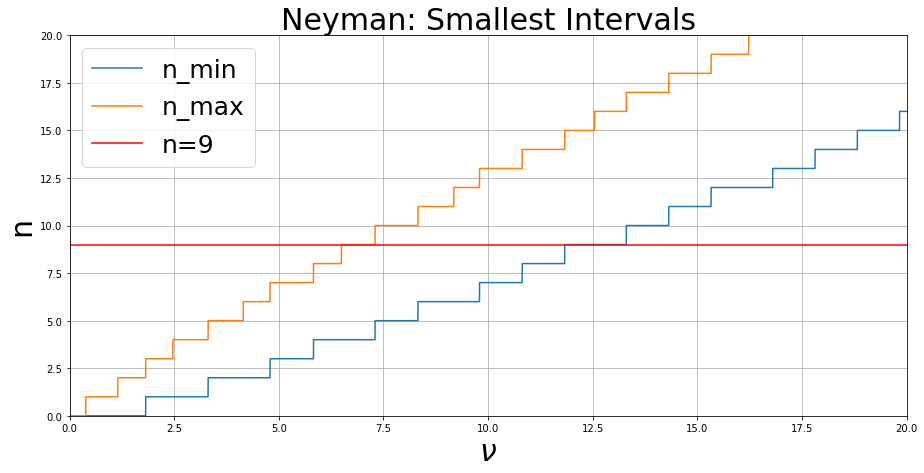

In [16]:
plt.figure(figsize=(15, 7))
plt.plot(x, n_min, label='n_min')
plt.plot(x, n_max, label='n_max')
plt.xlabel(r"$\nu$", fontsize=30)
plt.ylabel("n", fontsize=30)
plt.grid()
plt.title("Neyman: Smallest Intervals", fontsize=30)
plt.axhline([9], color='red', label="n=9")
plt.xlim(0,20)
plt.ylim(0,20)
plt.legend(fontsize=25)
plt.show()

In [17]:
mus_min = list()
mus_max = list()
for i in range(0,len(x)):
    if n_min[i] <= 9:
        mus_max.append(x[i])
    if n_max[i] >= 9:
        mus_min.append(x[i])
mu_min = min(mus_min)
mu_max = max(mus_max)
print(mu_min, mu_max)

(6.4950000000000001, 49.999000000000002)


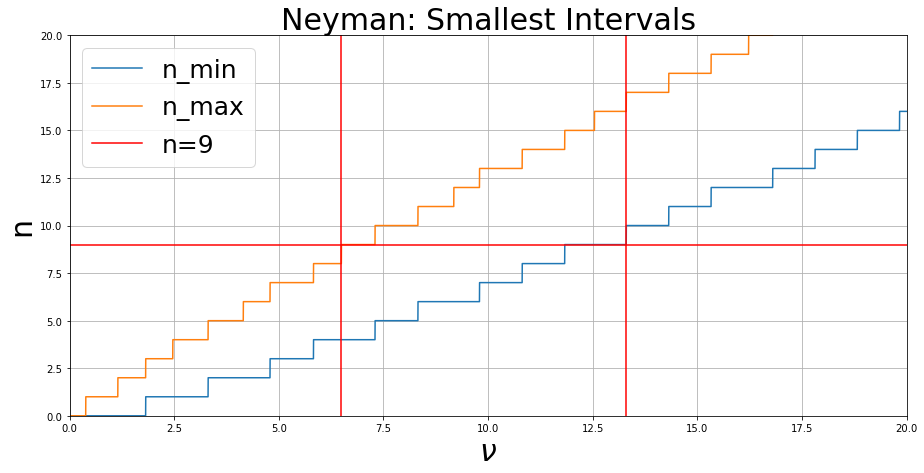

In [28]:
plt.figure(figsize=(15, 7))
plt.plot(x, n_min, label='n_min')
plt.plot(x, n_max, label='n_max')
plt.xlabel(r"$\nu$", fontsize=30)
plt.ylabel("n", fontsize=30)
plt.grid()
plt.title("Neyman: Smallest Intervals", fontsize=30)
plt.axhline([9], color='red', label="n=9")
plt.axvline([mu_min], color='red')
plt.axvline([mu_max], color='red')
plt.xlim(0,20)
plt.ylim(0,20)
plt.legend(fontsize=25)
plt.show()